In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of poping up a new window. More about that later. 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
from pylab import *
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

## Load data

In [5]:
distributed_systems = ['cassandra', 'hdfs', 'tensorflow', 'hbase', 'kafka', 'dummy']
custom_distributed_systems_name = ['Cassandra', 'HDFS (Datanodes)', 'Tensorflow (Tasks)', 'HBase (RegionServers)', 'Kafka (Servers)', 'Dummy (Processes)']

In [6]:
df = pd.read_csv('./result.csv')
df = df.append(pd.Series([0 for _ in range(len(distributed_systems) + 1)], index=df.columns), ignore_index=True)
df = df.set_index('nodes')
df = df.sort_index()
df_diff = df.diff().fillna(0) # differences between server

In [7]:
df

,cassandra,hdfs,tensorflow,hbase,kafka,dummy
nodes,,,,,,
0,0,0.000000,0,0.000000,0,0
10,130,195.332031,1200,292.998047,1429,20
20,276,400.430664,2500,595.762695,2837,40
30,439,595.762695,3700,869.227539,4260,60
40,602,820.394531,4900,1240.358398,5676,80
50,775,1015.726563,6100,1474.756836,7097,100
60,964,1211.058594,7300,1797.054688,8570,120
70,1174,1435.690430,8500,2217.018555,9930,140
80,1377,1611.489258,9600,2607.682617,11355,160


In [8]:
df_diff.head()

,cassandra,hdfs,tensorflow,hbase,kafka,dummy
nodes,,,,,,
0,0.0,0.000000,0.0,0.000000,0.0,0.0
10,130.0,195.332031,1200.0,292.998047,1429.0,20.0
20,146.0,205.098633,1300.0,302.764648,1408.0,20.0
30,163.0,195.332031,1200.0,273.464844,1423.0,20.0
40,163.0,224.631836,1200.0,371.130859,1416.0,20.0


In [9]:
df.index

Int64Index([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], dtype='int64', name='nodes')

## Plot Data

### 1. Real Data

Text(0, 0.5, 'Memory (MB)')

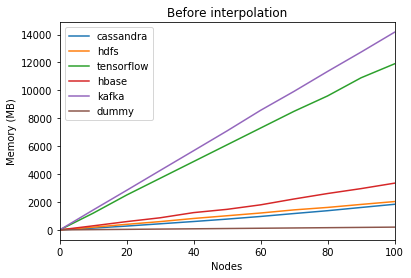

In [10]:
ax = df.plot.line()
ax.set_title('Before interpolation')
ax.set_xlabel("Nodes")
ax.set_ylabel("Memory (MB)")

### 2. Diff Data

Text(0, 0.5, 'Memory (MB)')

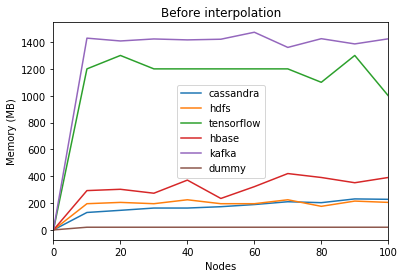

In [11]:
ax = df_diff.plot.line()
ax.set_title('Before interpolation')
ax.set_xlabel("Nodes")
ax.set_ylabel("Memory (MB)")

## Plot Interpolation Data

### Function

In [12]:
# f = interp1d(df.index, df['memory'], kind='cubic')
f = []
f_diff = []
for system in distributed_systems:
    f.append(interp1d(df.index, df[system], kind='cubic'))
    f_diff.append(interp1d(df_diff.index, df_diff[system], kind='cubic'))

### Recreate new Dataframe based on Interpolation Function

In [13]:
df_int = pd.DataFrame()
df_int_diff = pd.DataFrame()

new_index = np.arange(0, 110, 10)
# df_int['memory'] = f(new_index)

for i in range(len(distributed_systems)):
    df_int[custom_distributed_systems_name[i]] = f[i](new_index)
    df_int_diff[custom_distributed_systems_name[i]] = f_diff[i](new_index)
    
df_int.index = new_index
df_int_diff.index = new_index


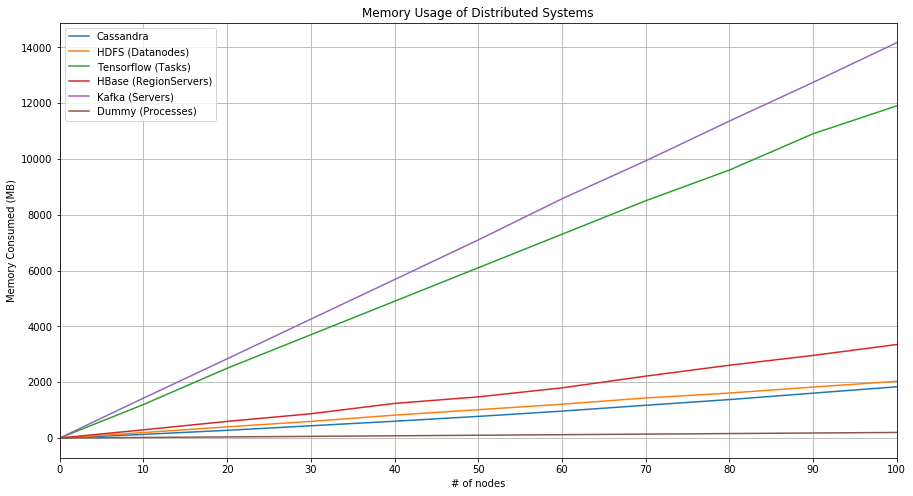

In [14]:
ax2 = df_int.plot.line(figsize=(15,8), grid=True)
ax2.set_title('Memory Usage of Distributed Systems')
ax2.set_xlabel("# of nodes")
ax2.set_ylabel("Memory Consumed (MB)")
ax2.set_xticks(np.arange(0, 110, 10))
# ax2.set_yticks(np.arange(0, 12000, 100))
# ax2.set_ylim(bottom=0)
# ax2.
plt.savefig('plot.png')

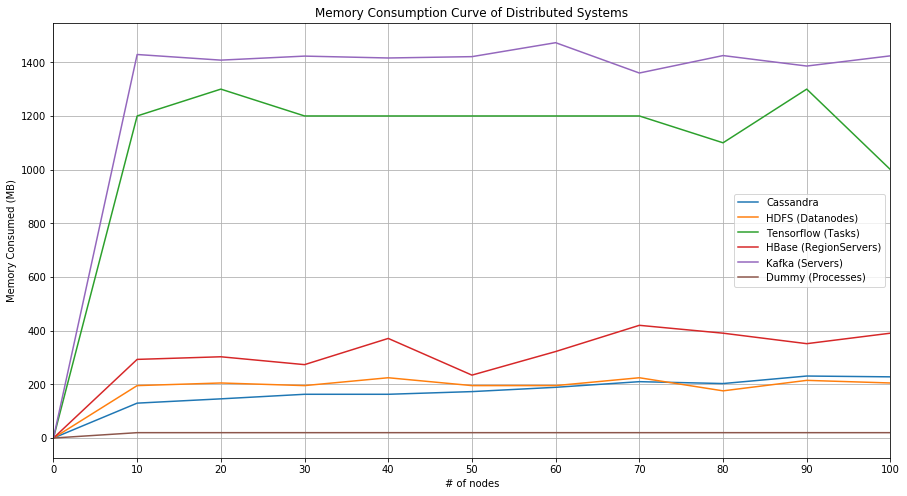

In [15]:
ax2 = df_int_diff.plot.line(figsize=(15,8), grid=True)
ax2.set_title('Memory Consumption Curve of Distributed Systems')
ax2.set_xlabel("# of nodes")
ax2.set_ylabel("Memory Consumed (MB)")
ax2.set_xticks(np.arange(0, 110, 10))
# ax2.set_yticks(np.arange(0, 12000, 100))
# ax2.set_ylim(bottom=0)
# ax2.
plt.savefig('plot_diff.png')

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(20, 15), sharex=True)

axes = []
for system in custom_distributed_systems_name: 
    ax.plot(df_int.index, df_int[system], label=system)
    axes.append(ax)
    ax2.plot(df_int.index, df_int[system], label=system)

    
ax.set_ylim(500, 13000)
ax2.set_ylim(0, 350)

fig.suptitle('Memory Usage of Distributed Systems', y=0.9, fontsize=14)
fig.text(0.5, 0.09, '# of Nodes', ha='center', va='center', fontsize=14)
fig.text(0.07, 0.5, 'Memory Consumed (MB)', ha='center', va='center', rotation='vertical', fontsize=14)

fig.subplots_adjust(hspace=0.05)

ax.set_yticks(np.arange(1100, 12000, 500))

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# fig.legend(axes,
#            labels=custom_distributed_systems_name,
# #            bbox_to_anchor=(0.5, 0.5), 
#            loc="best",
#            borderaxespad=0.1,
#            title="Legend")

ax.legend(loc="best")
#            bbox_to_anchor=(0.5, -0.1), 
#            loc="center right",   # Position of legend
#            borderaxespad=0.1,    # Small spacing around legend box
#            title="Legend Title")  # Title for the legend)

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.grid(True)
ax2.grid(True)

fig.savefig('plot.png')

# for system in custom_distributed_systems_name: 
#     ax2.plot(df_int.index, df_int[system])

# ax2.plot(df_int.index, df_int['HDFS (Datanodes)'])
# ax.plot(df_int['Cassandra'])
# ax2.plot(df_int['Cassandra'])

In [ ]:
#Defining the delta function
def delta(n):
    if n == 0:
        return 1
    else:
        return 0
   
#Defining lists

h_ = []
x_ = []
y_ = []
n = 7

#Writing the h[n] function in terms of delta function
for i in range(-n,n+1):
    h = delta(i) - delta(i-1) + delta(i-4) + delta(i-5)
    h_.append(h)

#Writing the x[n] function in terms of delta function
for i in range(-n,n+1):
    x = delta(i-1) + delta(i) + 2*delta(i+1) + delta(i+2)
    x_.append(x)

#Linearly Convolving the two functions
y_ = np.convolve(x_,h_,mode='full')

#Plotting the h[n] function
plt.figure(1)
markerline, stemlines, baseline = plt.stem(range(-n,n+1),h_, '--')
plt.setp(stemlines, 'color', 'b', 'linewidth', 2)
plt.setp(baseline, 'color', 'b', 'linewidth', 0.5)
plt.ylim([-6,6])
plt.xlim([-n,n])
plt.xlabel('$n$')
plt.ylabel('$h[n]$')
plt.title('$h[n] = \delta [n] - \delta [n-1] + \delta [n-4] + \delta [n-5] $')
plt.grid(True)

#Plotting the x[n] function
plt.figure(2)
markerline, stemlines, baseline = plt.stem(range(-n,n+1),x_, '--')
plt.setp(stemlines, 'color', 'b', 'linewidth', 2)
plt.setp(baseline, 'color', 'b', 'linewidth', 0.5)
plt.ylim([-6,6])
plt.xlim([-n,n])
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.title('$x[n] = \delta [n+2] + 2\delta [n+1] + \delta [n] + \delta [n-1]$')
plt.grid(True)

#Plotting the y[n] function
plt.figure(3)
markerline, stemlines, baseline = plt.stem(range(-2*n,2*n+1),y_, '--')
plt.setp(stemlines, 'color', 'b', 'linewidth', 2)
plt.setp(baseline, 'color', 'b', 'linewidth', 0.5)
plt.ylim([-6,6])
plt.xlim([-n,n])
plt.xlabel('$n$')
plt.ylabel('$y[n]$')
plt.title('$y[n] = \delta [n+2] + \delta [n+1] -\delta [n] + 3\delta [n-3] + 3\delta [n-4] + 2\delta [n-5] + \delta [n-6] $')
plt.grid(True)

plt.show()